## K-Nearest Neighbor(KNN) Algorithm

**K-Nearest Neighbor(KNN) Algorithm**

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


**Why do we need a K-NN Algorithm?**

* Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram:


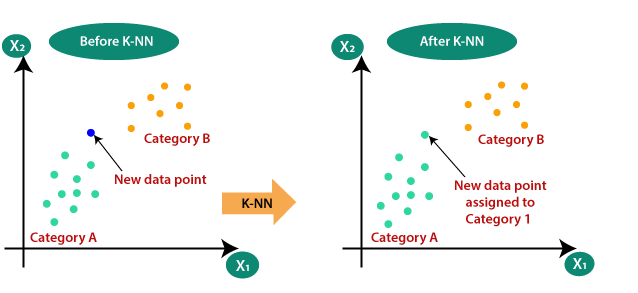

**How does K-NN work**

* The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

Suppose we have a new data point and we need to put it in the required category. Consider the below image:

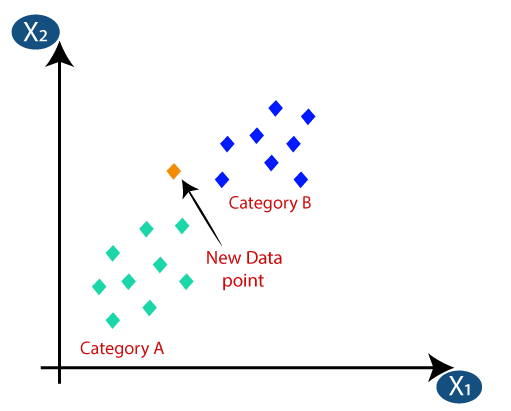

* Firstly, we will choose the number of neighbors, so we will choose the k=5.

* Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:


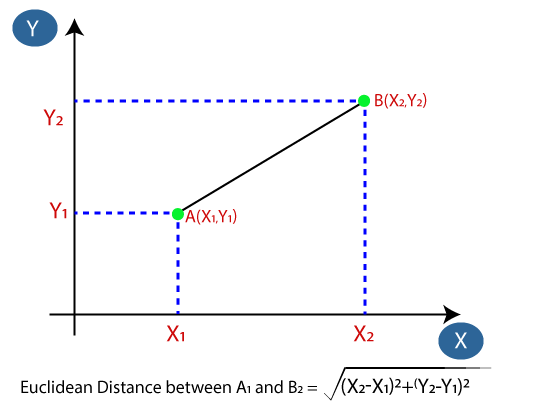

* By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

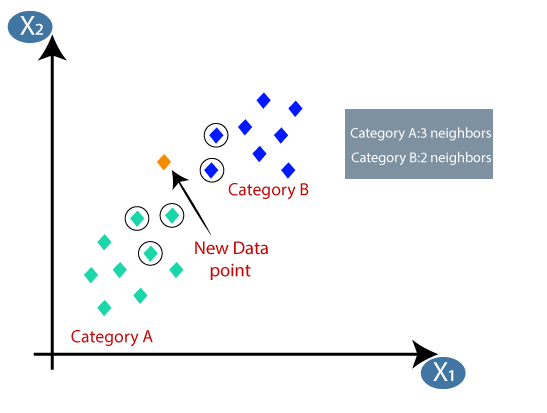

* As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.

**How to select the value of K in the K-NN Algorithm?**

Below are some points to remember while selecting the value of K in the K-NN algorithm:

* There is no particular way to determine the best value for "K", so we need to try some values to find the best value. The most preferred value for K is 5.
* A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
* Large values for K are good, but it may find some difficulties.


**Advantages of KNN Algorithm:**
    
* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.


**Disadvantages of KNN Algorithm:**
    
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.

## Compute KNN: distance metrics

* To recap, the goal of the k-nearest neighbor algorithm is to identify the nearest neighbors of a given query point, so that we can assign a class label to that point. In order to do this, KNN has a few requirements:

**Determine your distance metrics**

* In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. You commonly will see decision boundaries visualized with Voronoi diagrams.

* While there are several distance measures that you can choose from, this article will only cover the following:

**Euclidean distance (p=2):** 

* This is the most commonly used distance measure, and it is limited to real-valued vectors. Using the below formula, it measures a straight line between the query point and the other point being measured.

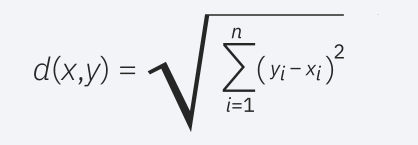

**Manhattan distance (p=1):** 

* This is also another popular distance metric, which measures the absolute value between two points. It is also referred to as taxicab distance or city block distance as it is commonly visualized with a grid, illustrating how one might navigate from one address to another via city streets.

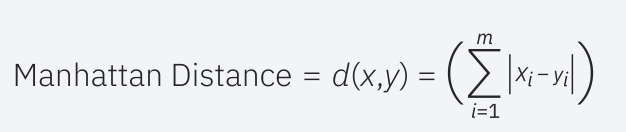

**Minkowski distance:** 

* This distance measure is the generalized form of Euclidean and Manhattan distance metrics. The parameter, p, in the formula below, allows for the creation of other distance metrics. Euclidean distance is represented by this formula when p is equal to two, and Manhattan distance is denoted with p equal to one.

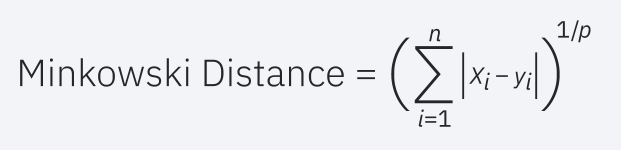

**Hamming distance:** 

* This technique is used typically used with Boolean or string vectors, identifying the points where the vectors do not match. As a result, it has also been referred to as the overlap metric. This can be represented with the following formula:

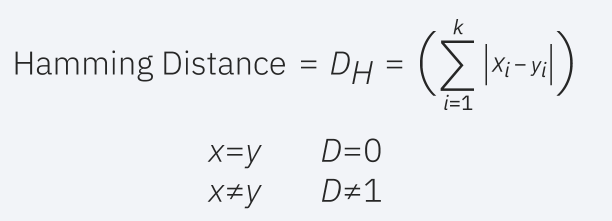

As an example, if you had the following strings, the hamming distance would be 2 since only two of the values differ.

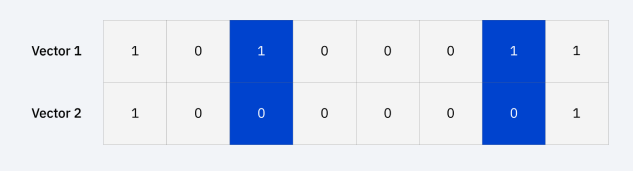

## KNN Algoritm

In [2]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Load Dataset
df = pd.read_csv("C:\\Users\\Pradip\\Desktop\\Dataset\\RidingMowers.csv")
df.head()

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought


In [5]:
#shape of dataset
df.shape

(180, 3)

In [6]:
#statistics of dataset
df.describe()

,Income,Lot_Size
count,180.000000,180.000000
mean,58.383333,69.361111
std,16.469126,29.641200
min,34.000000,20.000000
25%,44.000000,42.750000
50%,56.000000,69.000000
75%,73.000000,93.750000
max,89.000000,124.000000


In [7]:
#Null values check
df.isnull().sum()

Income      0
Lot_Size    0
Response    0
dtype: int64

In [9]:
#Lebal Encoding (get_dummies)
dum_df = pd.get_dummies(df)
dum_df.head(5)

,Income,Lot_Size,Response_Bought,Response_Not Bought
0,34,26,0,1
1,34,40,0,1
2,34,46,0,1
3,34,48,0,1
4,34,53,0,1


In [10]:
# drop one column 
dum_df = dum_df.drop('Response_Not Bought', axis=1)
dum_df.head(5)

,Income,Lot_Size,Response_Bought
0,34,26,0
1,34,40,0
2,34,46,0
3,34,48,0
4,34,53,0


In [11]:
#X,y selection
X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

print(y.value_counts())
pd.crosstab(index=y,columns='Prop',normalize='all')

0    107
1     73
Name: Response_Bought, dtype: int64


col_0,Prop
Response_Bought,
0,0.594444
1,0.405556


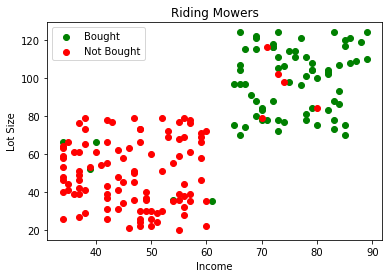

In [12]:
#### Visualizing the Data
import matplotlib.pyplot as plt
X_B = X[y==1]
X_NB = X[y==0]
plt.scatter(X_B.Income,X_B.Lot_Size,c="green",label="Bought")
plt.scatter(X_NB.Income,X_NB.Lot_Size,c="red",label="Not Bought")
plt.legend()
plt.title("Riding Mowers")
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.show()

In [13]:
#train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=20, stratify=y)

### KNN model

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[31  1]
 [ 3 19]]


In [17]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [18]:
print(accuracy_score(y_test, y_pred))

0.9259259259259259


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.95      0.86      0.90        22

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



C:\Users\Pradip\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


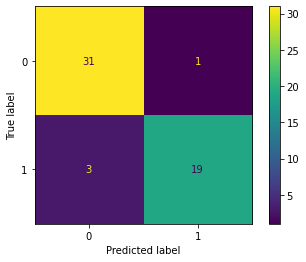

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()

In [21]:
#########################################################
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

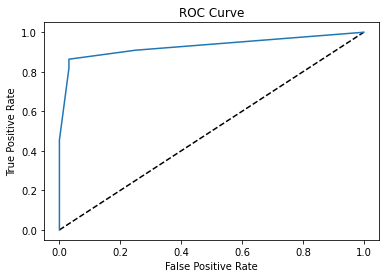

In [22]:
############ Plot ROC curve #############
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## GridSearchCV and CV

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'n_neighbors': np.array([1,3,5,7,9,11,13,15])}
print(parameters)


{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])}


## CV

In [25]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)

In [26]:

knn = KNeighborsClassifier()
# Tuned according to accuracy score
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold)

In [27]:
df = pd.read_csv("C:\\Users\\Pradip\\Desktop\\Dataset\\RidingMowers.csv")

In [29]:
dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Response_Not Bought', axis=1)
dum_df.head(5)

,Income,Lot_Size,Response_Bought
0,34,26,0
1,34,40,0
2,34,46,0
3,34,48,0
4,34,53,0


In [30]:

X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

In [35]:
cv.fit( X , y )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])})

In [34]:
# Table of Grid Search CV Results
df_cv = pd.DataFrame(cv.cv_results_  )
df_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008712,0.001472,0.008466,0.003247,1,{'n_neighbors': 1},0.833333,0.916667,0.888889,0.861111,0.777778,0.855556,0.047791,8
1,0.002995,0.003335,0.004419,0.003890,3,{'n_neighbors': 3},0.972222,0.972222,0.916667,0.944444,0.888889,0.938889,0.032394,4
2,0.003411,0.006821,0.006937,0.008501,5,{'n_neighbors': 5},0.972222,0.972222,0.916667,0.944444,0.916667,0.944444,0.024845,1
3,0.000000,0.000000,0.009687,0.007923,7,{'n_neighbors': 7},0.972222,0.972222,0.916667,0.944444,0.916667,0.944444,0.024845,1
4,0.003594,0.006680,0.006692,0.008225,9,{'n_neighbors': 9},0.944444,0.972222,0.916667,0.944444,0.916667,0.938889,0.020787,4
5,0.006249,0.007653,0.003132,0.006264,11,{'n_neighbors': 11},0.972222,0.972222,0.916667,0.944444,0.916667,0.944444,0.024845,1
6,0.003393,0.006284,0.003585,0.006663,13,{'n_neighbors': 13},0.944444,0.972222,0.916667,0.944444,0.916667,0.938889,0.020787,4
7,0.003351,0.006702,0.006272,0.007681,15,{'n_neighbors': 15},0.944444,0.972222,0.888889,0.944444,0.916667,0.933333,0.028328,7


In [33]:
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 5}
0.9444444444444444
